In [ ]:
!pip -q install langchain openai==0.27.0 tiktoken

# Summarization

History  
Challenges  
Fine-tuning  
Instruct Tuning

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "your-api-key"

In [ ]:
!pip show langchain

Name: langchain
Version: 0.2.0
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


### Setting up Summarization Chain

In [ ]:
!pip install langchain_community

In [ ]:
from langchain import OpenAI, PromptTemplate, LLMChain
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.mapreduce import MapReduceChain
from langchain.prompts import PromptTemplate

llm = OpenAI(temperature=0)

In [ ]:
text_splitter = CharacterTextSplitter()

In [ ]:
# load the doc
with open('/content/how_to_win_friends.txt_') as f:
    how_to_win_friends = f.read()
texts = text_splitter.split_text(how_to_win_friends)

In [ ]:
len(texts)

1

In [ ]:
from langchain.docstore.document import Document

docs = [Document(page_content=t) for t in texts[:4]]

In [ ]:
docs

[Document(page_content='How to win friends\nWinning friends is not about using manipulative tactics or pretending to be someone you’re not. It’s about being genuine, empathetic, and genuinely interested in others. Here are some key takeaways from the search results:\n\nBe a nice guy: It’s crucial to genuinely be a nice person, not just pretend to be one. People can spot insincerity from a mile away.\nStart with a friendly approach: Begin conversations with a friendly tone and try to get the other person saying “yes, yes” immediately.\nLet others do the talking: Allow others to share their thoughts and ideas, and show genuine interest in what they have to say.\nSee things from others’ perspectives: Try to understand where others are coming from and see things from their point of view.\nCommunicate effectively: Learn how to communicate effectively, both verbally and non-verbally, to build strong relationships.\nBe a good listener: Listen actively and attentively to others, and show that 

## Document Chains

Document Chains is a concept in the LangChain library, which is a Python framework for building conversational AI models. A Document Chain is a type of chain in LangChain that enables the model to retrieve and generate text based on a set of input documents.

In essence, a Document Chain is a pipeline that processes a set of documents and generates a response to a user's query or prompt. The chain consists of several components:

1. **Document Retrieval**: This component retrieves relevant documents from a corpus or database based on the user's query.
2. **Document Embeddings**: This component generates vector embeddings for each retrieved document, which capture the semantic meaning of the document.
3. **Retrieval**: This component uses the document embeddings to retrieve the most relevant documents that match the user's query.
4. **Generation**: This component generates a response to the user's query based on the retrieved documents.

The Document Chain is designed to handle complex, open-domain questions that require the model to retrieve and synthesize information from multiple documents. By chaining together these components, the model can generate more accurate and informative responses to user queries.

Some key benefits of Document Chains include:

* **Improved accuracy**: By retrieving and synthesizing information from multiple documents, the model can provide more accurate and comprehensive responses.
* **Increased context**: Document Chains can capture the context and relationships between different documents, enabling the model to generate more informed responses.
* **Flexibility**: Document Chains can be used for a wide range of applications, including question answering, text summarization, and chatbots.

Overall, Document Chains are a powerful tool in LangChain that enable conversational AI models to retrieve and generate text based on a set of input documents, leading to more accurate and informative responses.

##  Types of CombineDocuments Chains

[Check out this Fantastic Blog :](https://medium.com/@vinusebastianthomas/document-chains-in-langchain-d33c4bdbabd8)

## Summarize Simple with map_reduce

### Map Reduce
This method involves **an initial prompt on each chunk of data ***
( for summarization tasks, this could be a summary of that chunk; for question-answering tasks, it could be an answer based solely on that chunk). **Then a different prompt is run to combine all the initial outputs.** This is implemented in the LangChain as the MapReduceDocumentsChain.

**Pros:** Can scale to larger documents (and more documents) than StuffDocumentsChain. The calls to the LLM on individual documents are independent and can therefore be parallelized.

**Cons:** Requires many more calls to the LLM than StuffDocumentsChain. Loses some information during the final combining call.


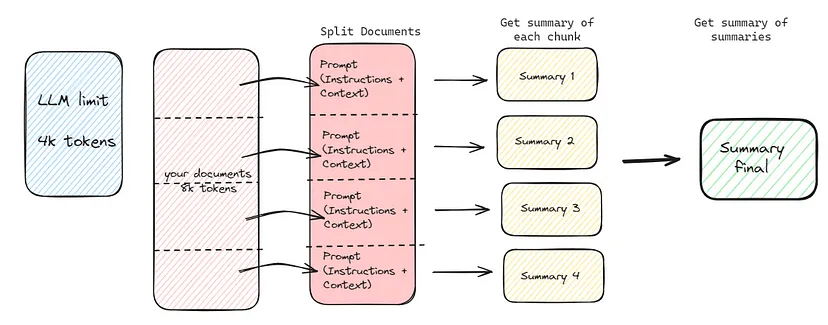

In [ ]:
from langchain.chains.summarize import load_summarize_chain
import textwrap

In [ ]:
chain = load_summarize_chain(llm,
                             chain_type="map_reduce")


output_summary = chain.run(docs)
wrapped_text = textwrap.fill(output_summary, width=100)
print(wrapped_text)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


  Building strong relationships involves being genuine, empathetic, and interested in others. This
includes being a nice person, starting conversations in a friendly manner, actively listening, and
communicating effectively. It is also important to understand others' perspectives and be authentic.


In [ ]:
# for summarizing each part
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [ ]:
# for combining the parts
chain.combine_document_chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [ ]:
chain = load_summarize_chain(llm,
                             chain_type="map_reduce",
                             verbose=True
                             )


output_summary = chain.run(docs)
wrapped_text = textwrap.fill(output_summary,
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"How to win friends
Winning friends is not about using manipulative tactics or pretending to be someone you’re not. It’s about being genuine, empathetic, and genuinely interested in others. Here are some key takeaways from the search results:

Be a nice guy: It’s crucial to genuinely be a nice person, not just pretend to be one. People can spot insincerity from a mile away.
Start with a friendly approach: Begin conversations with a friendly tone and try to get the other person saying “yes, yes” immediately.
Let others do the talking: Allow others to share their thoughts and ideas, and show genuine interest in what they have to say.
See things from others’ perspectives: Try to understand where others are coming from and see things from their point of view.
Communicate effectively: Learn how to communicate effectively, both verbally and

### Summarizing with the 'stuff' Chain



### Stuffing
Stuffing is the simplest method, whereby you simply stuff all the related data into the prompt as context to pass to the language model. This is implemented in LangChain as the StuffDocumentsChain.

**Pros:** Only makes a single call to the LLM. When generating text, the LLM has access to all the data at once.

**Cons:** Most LLMs have a context length, and for large documents (or many documents) this will not work as it will result in a prompt larger than the context length.

The main downside of this method is that **it only works one smaller pieces of data.**  Once you are working with many pieces of data, this approach is no longer feasible. The next two approaches are designed to help deal with that.

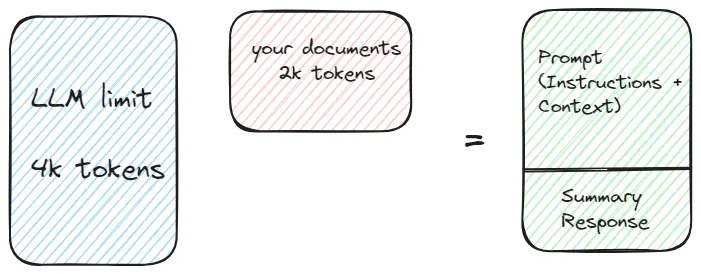



In [ ]:
chain = load_summarize_chain(llm, chain_type="stuff")

In [ ]:
prompt_template = """Write a concise bullet point summary of the following:


{text}


CONSCISE SUMMARY IN BULLET POINTS:"""

BULLET_POINT_PROMPT = PromptTemplate(template=prompt_template,
                        input_variables=["text"])


In [ ]:
chain = load_summarize_chain(llm,
                             chain_type="stuff",
                             prompt=BULLET_POINT_PROMPT)

output_summary = chain.run(docs)

wrapped_text = textwrap.fill(output_summary,
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

 
- Winning friends is about being genuine, empathetic, and interested in others
- Be a nice person,
not just pretend to be one
- Start conversations with a friendly tone and get others to say "yes"
-
Let others talk and show genuine interest in their thoughts
- Try to understand others' perspectives
- Communicate effectively, both verbally and non-verbally
- Be a good listener and value others'
opinions
- Be authentic and don't pretend to be someone you're not.


### Ver 3 With 'map_reduce' with our custom prompt

In [ ]:
chain = load_summarize_chain(llm,
                             chain_type="map_reduce",
                             map_prompt=BULLET_POINT_PROMPT,
                             combine_prompt=BULLET_POINT_PROMPT)

# chain.llm_chain.prompt= BULLET_POINT_PROMPT
# chain.combine_document_chain.llm_chain.prompt= BULLET_POINT_PROMPT

output_summary = chain.run(docs)
wrapped_text = textwrap.fill(output_summary,
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

 

- Genuine, empathetic, and interested in others
- Be a nice person, not just pretend to be one
-
Start conversations with a friendly tone and get others to say "yes"
- Listen and show genuine
interest in others' thoughts
- Understand others' perspectives
- Communicate effectively, both
verbally and non-verbally
- Be a good listener and value others' opinions
- Be authentic and
genuine.


In [ ]:
# with a custom prompt
prompt_template = """Write a concise summary of the following:


{text}


CONSCISE SUMMARY IN BULLET POINTS:"""

PROMPT = PromptTemplate(template=prompt_template,
                        input_variables=["text"])

## with intermediate steps
chain = load_summarize_chain(OpenAI(temperature=0),
                             chain_type="map_reduce",
                             return_intermediate_steps=True,
                             map_prompt=PROMPT,
                             combine_prompt=PROMPT)

output_summary = chain({"input_documents": docs}, return_only_outputs=True)
wrapped_text = textwrap.fill(output_summary['output_text'],
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


 

- Winning friends involves being genuine, empathetic, and interested in others.
- Sincerity is
important, as insincerity is easily detected.
- Use a friendly tone and encourage others to say
"yes, yes" in conversations.
- Show genuine interest in others' thoughts and ideas and allow them to
talk.
- Try to understand others' perspectives and communicate effectively to build strong
relationships.
- Be a good listener and value others' opinions and thoughts.
- Authenticity is
crucial, avoid pretending to be someone else or having fake interests.


In [ ]:
wrapped_text = textwrap.fill(output_summary['intermediate_steps'][0],
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

 

- Winning friends is about being genuine, empathetic, and interested in others
- Being a nice
person is crucial, insincerity is easily spotted
- Start conversations with a friendly tone and get
the other person saying "yes, yes"
- Allow others to talk and show genuine interest in their
thoughts and ideas
- Try to understand others' perspectives and see things from their point of view
- Communicate effectively, both verbally and non-verbally, to build strong relationships
- Be a good
listener and show that you value others' opinions and thoughts
- Authenticity is key, don't pretend
to be someone you're not or have fake interests.


### With the 'refine' CombineDocument Chain

## Refine
This method involves **an initial prompt on the first chunk of data, generating some output. For the remaining documents, that output is passed in, along with the next document**, asking the LLM to refine the output based on the new document.

**Pros:** Can pull in more relevant context, and may be less lossy than MapReduceDocumentsChain.

**Cons:** Requires many more calls to the LLM than StuffDocumentsChain. The calls are also NOT independent, meaning they cannot be paralleled like MapReduceDocumentsChain. There is also some potential dependencies on the ordering of the documents.

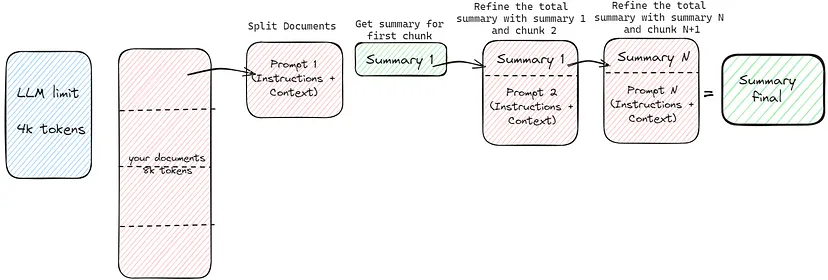

In [ ]:
chain = load_summarize_chain(llm, chain_type="refine")

output_summary = chain.run(docs)
wrapped_text = textwrap.fill(output_summary, width=100)
print(wrapped_text)

 Winning friends is not about manipulation, but about being genuine, empathetic, and interested in
others. Key takeaways include being a nice person, starting conversations with a friendly tone,
listening actively, understanding others' perspectives, communicating effectively, and being
authentic.


In [ ]:
prompt_template = """Write a concise summary of the following extracting the key information:


{text}


CONCISE SUMMARY:"""
PROMPT = PromptTemplate(template=prompt_template,
                        input_variables=["text"])

refine_template = (
    "Your job is to produce a final summary\n"
    "We have provided an existing summary up to a certain point: {existing_answer}\n"
    "We have the opportunity to refine the existing summary"
    "(only if needed) with some more context below.\n"
    "------------\n"
    "{text}\n"
    "------------\n"
    "Given the new context, refine the original summary"
    "If the context isn't useful, return the original summary."
)
refine_prompt = PromptTemplate(
    input_variables=["existing_answer", "text"],
    template=refine_template,
)
chain = load_summarize_chain(OpenAI(temperature=0),
                             chain_type="refine",
                             return_intermediate_steps=True,
                             question_prompt=PROMPT,
                             refine_prompt=refine_prompt)


In [ ]:
output_summary = chain({"input_documents": docs}, return_only_outputs=True)
wrapped_text = textwrap.fill(output_summary['output_text'],
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

 Winning friends is about being genuine, empathetic, and interested in others. Key takeaways include
being a nice person, starting conversations with a friendly tone, listening actively, understanding
others' perspectives, communicating effectively, and being authentic.


In [ ]:
wrapped_text = textwrap.fill(output_summary['intermediate_steps'][0],
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

 Winning friends is about being genuine, empathetic, and interested in others. Key takeaways include
being a nice person, starting conversations with a friendly tone, listening actively, understanding
others' perspectives, communicating effectively, and being authentic.




# **Map Rerank Document Chain:**

The Map Rerank Document Chain is a type of Document Chain in LangChain that enables the model to retrieve and rerank documents based on their relevance to a user's query. The chain consists of two main components:

1. **Map**: This component maps the user's query to a set of relevant documents from a corpus or database. This is typically done using a retrieval algorithm, such as BM25 or DPR, that scores documents based on their similarity to the query.
2. **Rerank**: This component takes the top-N documents retrieved in the Map step and reranks them based on their relevance to the user's query. This is typically done using a more sophisticated model, such as a neural network, that can capture nuanced relationships between the query and documents.

**Pros:**

1. **Improved accuracy**: The Rerank step can improve the accuracy of document retrieval by filtering out irrelevant documents and promoting more relevant ones.
2. **Reduced noise**: The Rerank step can reduce noise in the retrieved documents, leading to more relevant and accurate results.
3. **Increased flexibility**: The Map Rerank Document Chain can be used with various retrieval algorithms and reranking models, making it a flexible and adaptable approach.
4. **Scalability**: The Map Rerank Document Chain can be parallelized, making it scalable for large datasets and high-volume queries.

**Cons:**

1. **Increased computational cost**: The Rerank step can be computationally expensive, especially when using complex neural networks or large datasets.
2. **Overfitting risk**: The Rerank step can lead to overfitting if the model is not properly regularized or if the training data is limited.
3. **Cold start problem**: The Map Rerank Document Chain can struggle with the cold start problem, where there is limited data or no data available for a particular query or topic.
4. **Dependence on retrieval algorithm**: The performance of the Map Rerank Document Chain depends heavily on the quality of the retrieval algorithm used in the Map step. If the retrieval algorithm is poor, the Rerank step may not be able to improve the results significantly.

**Use cases:**

1. **Question answering**: The Map Rerank Document Chain is well-suited for question answering tasks, where the goal is to retrieve relevant documents that answer a specific question.
2. **Text summarization**: The Map Rerank Document Chain can be used for text summarization tasks, where the goal is to retrieve and summarize relevant documents based on a user's query.
3. **Chatbots and conversational AI**: The Map Rerank Document Chain can be used in chatbots and conversational AI systems to retrieve and generate responses to user queries.

**Real-world examples:**

1. **Google Search**: Google Search uses a variant of the Map Rerank Document Chain to retrieve and rank search results.
2. **Bing Search**: Bing Search also uses a variant of the Map Rerank Document Chain to retrieve and rank search results.
3. **Chatbots**: Many chatbots and conversational AI systems use the Map Rerank Document Chain to retrieve and generate responses to user queries.

In summary, the Map Rerank Document Chain is a powerful approach for document retrieval and reranking, offering improved accuracy and reduced noise. However, it also comes with increased computational cost and the risk of overfitting. By understanding the pros and cons of this approach, developers can design and implement more effective document retrieval systems.

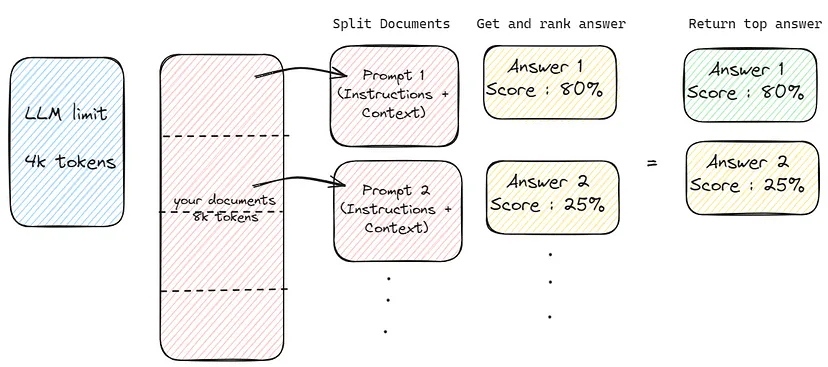